Combined Inet Class Drop ROC

In [3]:
import os
import torch
import numpy as np
from sklearn.metrics import roc_curve
from tqdm import tqdm

dir = "/work3/nkale/ml-projects/classification-quantile-mia/image_QMIA_v2/models/mia/base_imagenet-1k/0_16/resnet-50/attack_imagenet-1k/0_16/facebook/convnext-tiny-224/score_fn_top_two_margin/loss_fn_gaussian"

tprs, fprs = [], []

settings = (10, 30, 50, 100, 200, 500, 750, 900, 950, 990)
for i in tqdm(settings):
    test_pred_file = os.path.join(dir, f"cls_drop_0to{i}/predictions/predictions_test.pt")
    val_pred_file = os.path.join(dir, f"cls_drop_0to{i}/predictions/predictions_val.pt")

    test_preds = torch.load(test_pred_file)
    val_preds = torch.load(val_pred_file)
    
    cls_drop = range(0, i)

    test_mask = torch.tensor([label.item() in cls_drop for label in test_preds[3]])
    test_preds_ood = [pred[test_mask] for pred in test_preds]
    val_mask = torch.tensor([label.item() in cls_drop for label in val_preds[3]])
    val_preds_ood = [pred[val_mask] for pred in val_preds]

    test_pred_scores, test_target_scores = test_preds_ood[0], test_preds_ood[1]
    val_pred_scores, val_target_scores = val_preds_ood[0], val_preds_ood[1]

    # Compute z-scores
    test_mu, test_log_std = test_pred_scores[:, 0], test_pred_scores[:, 1]
    test_std = torch.exp(test_log_std)
    test_z_scores = (test_target_scores - test_mu) / test_std
    test_z_scores = test_z_scores.cpu().numpy()

    val_mu, val_log_std = val_pred_scores[:, 0], val_pred_scores[:, 1]
    val_std = torch.exp(val_log_std)
    val_z_scores = (val_target_scores - val_mu) / val_std
    val_z_scores = val_z_scores.cpu().numpy()

    z_scores = np.concatenate((test_z_scores, val_z_scores))
    labels = np.concatenate((np.ones(len(test_z_scores)), np.zeros(len(val_z_scores))))
    fpr, tpr, _ = roc_curve(labels, z_scores)

    tprs += [tpr]
    fprs += [fpr]

# BASELINE
# test_pred_file = os.path.join(dir, f"cls_drop_none/predictions/predictions_test.pt")
# val_pred_file = os.path.join(dir, f"cls_drop_none/predictions/predictions_val.pt")

# test_preds = torch.load(test_pred_file)
# val_preds = torch.load(val_pred_file)

# test_pred_scores, test_target_scores = test_preds[0], test_preds[1]
# val_pred_scores, val_target_scores = val_preds[0], val_preds[1]

# scores = np.concatenate((test_target_scores.cpu().numpy(), val_target_scores.cpu().numpy()))
# labels = np.concatenate((np.ones(len(test_z_scores)), np.zeros(len(val_z_scores))))
# base_marginal_fpr, base_marginal_tpr, _ = roc_curve(labels, scores)

# # Compute z-scores
# test_mu, test_log_std = test_pred_scores[:, 0], test_pred_scores[:, 1]
# test_std = torch.exp(test_log_std)
# test_z_scores = (test_target_scores - test_mu) / test_std
# test_z_scores = test_z_scores.cpu().numpy()

# val_mu, val_log_std = val_pred_scores[:, 0], val_pred_scores[:, 1]
# val_std = torch.exp(val_log_std)
# val_z_scores = (val_target_scores - val_mu) / val_std
# val_z_scores = val_z_scores.cpu().numpy()

# z_scores = np.concatenate((test_z_scores, val_z_scores))
# base_fpr, base_tpr, _ = roc_curve(labels, z_scores)

100%|██████████| 10/10 [01:40<00:00, 10.04s/it]


In [7]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

MIN = 1e-4
plt.figure(figsize=(10, 8))
rcParams['font.family'] = 'Linux Libertine O'
rcParams['font.size']=20

for setting, (tpr, fpr) in zip(settings, zip(tprs, fprs)):
    plt.plot(fpr, tpr, label=f"{setting} missing classes", linewidth=2)
plt.plot([MIN, 1], [MIN, 1], linestyle='--', color='lightgray', label="Random", linewidth=2)
plt.xlim([MIN, 1])
plt.ylim([MIN, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.savefig(os.path.join(dir, "inet_cls_drop_ood.pdf"), bbox_inches='tight')
plt.close()

Combined Inet Class Drop ROC

In [71]:
import os
import torch
import numpy as np
from sklearn.metrics import roc_curve
from tqdm import tqdm

dir = "/work3/nkale/ml-projects/classification-quantile-mia/image_QMIA_v2/models/mia/base_imagenet-1k/0_16/resnet-50/attack_imagenet-1k/0_16/facebook/convnext-tiny-224/score_fn_top_two_margin/loss_fn_gaussian"

tprs, fprs = [], []

settings = (10, 30, 50, 100, 500, 750, 900, 950, 990)
for i in tqdm(settings):
    test_pred_file = os.path.join(dir, f"cls_drop_0to{i}/predictions/predictions_test.pt")
    val_pred_file = os.path.join(dir, f"cls_drop_0to{i}/predictions/predictions_val.pt")

    test_preds = torch.load(test_pred_file)
    val_preds = torch.load(val_pred_file)
    
    # cls_drop = range(0, i)

    # test_mask = torch.tensor([label.item() in cls_drop for label in test_preds[3]])
    # test_preds_ood = [pred[test_mask] for pred in test_preds]
    # val_mask = torch.tensor([label.item() in cls_drop for label in val_preds[3]])
    # val_preds_ood = [pred[val_mask] for pred in val_preds]

    test_pred_scores, test_target_scores = test_preds[0], test_preds[1]
    val_pred_scores, val_target_scores = val_preds[0], val_preds[1]

    # Compute z-scores
    test_mu, test_log_std = test_pred_scores[:, 0], test_pred_scores[:, 1]
    test_std = torch.exp(test_log_std)
    test_z_scores = (test_target_scores - test_mu) / test_std
    test_z_scores = test_z_scores.cpu().numpy()

    val_mu, val_log_std = val_pred_scores[:, 0], val_pred_scores[:, 1]
    val_std = torch.exp(val_log_std)
    val_z_scores = (val_target_scores - val_mu) / val_std
    val_z_scores = val_z_scores.cpu().numpy()

    z_scores = np.concatenate((test_z_scores, val_z_scores))
    labels = np.concatenate((np.ones(len(test_z_scores)), np.zeros(len(val_z_scores))))
    fpr, tpr, _ = roc_curve(labels, z_scores)

    tprs += [tpr]
    fprs += [fpr]

# BASELINE
test_pred_file = os.path.join(dir, f"cls_drop_none/predictions/predictions_test.pt")
val_pred_file = os.path.join(dir, f"cls_drop_none/predictions/predictions_val.pt")

test_preds = torch.load(test_pred_file)
val_preds = torch.load(val_pred_file)

test_pred_scores, test_target_scores = test_preds[0], test_preds[1]
val_pred_scores, val_target_scores = val_preds[0], val_preds[1]

scores = np.concatenate((test_target_scores.cpu().numpy(), val_target_scores.cpu().numpy()))
labels = np.concatenate((np.ones(len(test_z_scores)), np.zeros(len(val_z_scores))))
base_marginal_fpr, base_marginal_tpr, _ = roc_curve(labels, scores)

# Compute z-scores
test_mu, test_log_std = test_pred_scores[:, 0], test_pred_scores[:, 1]
test_std = torch.exp(test_log_std)
test_z_scores = (test_target_scores - test_mu) / test_std
test_z_scores = test_z_scores.cpu().numpy()

val_mu, val_log_std = val_pred_scores[:, 0], val_pred_scores[:, 1]
val_std = torch.exp(val_log_std)
val_z_scores = (val_target_scores - val_mu) / val_std
val_z_scores = val_z_scores.cpu().numpy()

z_scores = np.concatenate((test_z_scores, val_z_scores))
base_fpr, base_tpr, _ = roc_curve(labels, z_scores)

100%|██████████| 9/9 [00:26<00:00,  2.92s/it]


In [ ]:
# unique_elements, counts = torch.unique(test_preds[3], return_counts=True)
# # print("Unique elements:", unique_elements)
# print("Counts:", counts)
# print("Minimum count:", counts.min().item())

Unique elements: tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175,

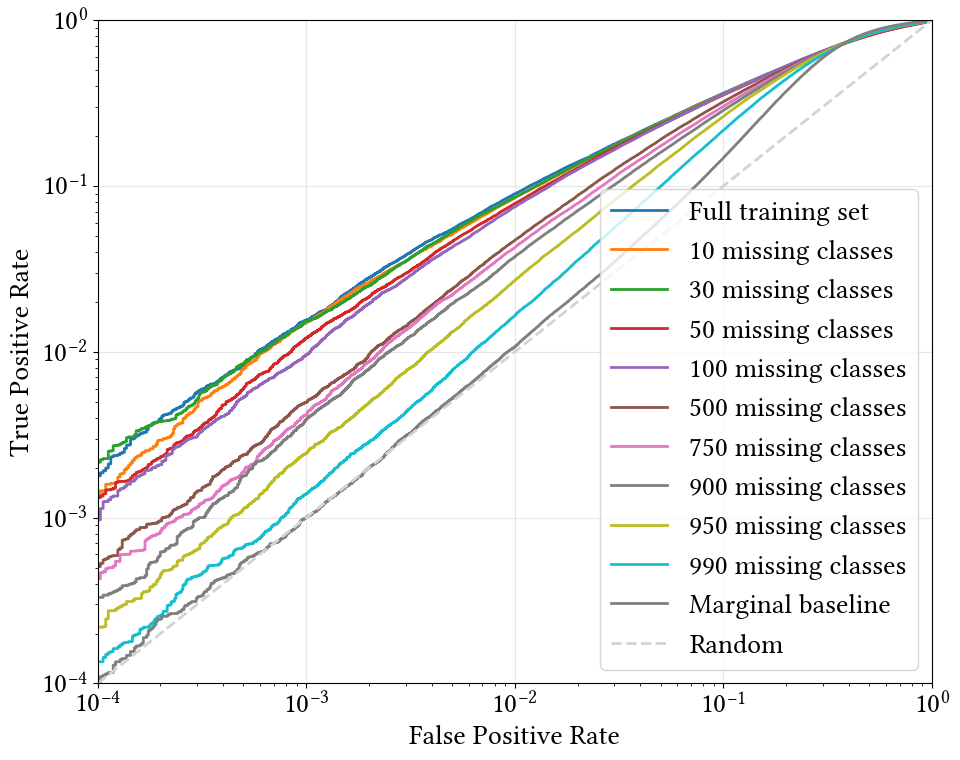

In [73]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

MIN = 1e-4
plt.figure(figsize=(10, 8))
rcParams['font.family'] = 'Linux Libertine O'
rcParams['font.size']=20

plt.plot(base_fpr, base_tpr, label="Full training set", linewidth=2)
for setting, (tpr, fpr) in zip(settings, zip(tprs, fprs)):
    plt.plot(fpr, tpr, label=f"{setting} missing classes", linewidth=2)
plt.plot(base_marginal_fpr, base_marginal_tpr, color='gray', label="Marginal baseline", linewidth=2)
plt.plot([MIN, 1], [MIN, 1], linestyle='--', color='lightgray', label="Random", linewidth=2)
plt.xlim([MIN, 1])
plt.ylim([MIN, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

In [3]:
output_dict = {}
for setting, (tpr, fpr) in zip(settings, zip(tprs, fprs)):
    output_dict[f"cls_drop_0to{setting}"] = (fpr, tpr)
output_dict["cls_drop_none"] = (base_fpr, base_tpr)
output_dict["marginal"] = (base_marginal_fpr, base_marginal_tpr)
np.savez("data_for_pt/inet_cls_drop_data.npz", **output_dict)

Combined Inet Sample Drop ROC

In [63]:
import os
import torch
import numpy as np
from sklearn.metrics import roc_curve
from tqdm import tqdm

dir = "/work3/nkale/ml-projects/classification-quantile-mia/image_QMIA_v2/models/mia/base_imagenet-1k/0_16/resnet-50/attack_imagenet-1k/0_16/facebook/convnext-tiny-224/score_fn_top_two_margin/loss_fn_gaussian"

tprs, fprs = [], []

settings = (1, 5, 10, 25, 50, 100)
for i in tqdm(settings):
    test_pred_file = os.path.join(dir, f"cls_drop_none_samples_{i}/predictions/predictions_test.pt")
    val_pred_file = os.path.join(dir, f"cls_drop_none_samples_{i}/predictions/predictions_val.pt")

    test_preds = torch.load(test_pred_file)
    val_preds = torch.load(val_pred_file)
    
    test_pred_scores, test_target_scores = test_preds[0], test_preds[1]
    val_pred_scores, val_target_scores = val_preds[0], val_preds[1]

    # Compute z-scores
    test_mu, test_log_std = test_pred_scores[:, 0], test_pred_scores[:, 1]
    test_std = torch.exp(test_log_std)
    test_z_scores = (test_target_scores - test_mu) / test_std
    test_z_scores = test_z_scores.cpu().numpy()

    val_mu, val_log_std = val_pred_scores[:, 0], val_pred_scores[:, 1]
    val_std = torch.exp(val_log_std)
    val_z_scores = (val_target_scores - val_mu) / val_std
    val_z_scores = val_z_scores.cpu().numpy()

    z_scores = np.concatenate((test_z_scores, val_z_scores))
    labels = np.concatenate((np.ones(len(test_z_scores)), np.zeros(len(val_z_scores))))
    fpr, tpr, _ = roc_curve(labels, z_scores)

    tprs += [tpr]
    fprs += [fpr]

# BASELINE
test_pred_file = os.path.join(dir, f"cls_drop_none/predictions/predictions_test.pt")
val_pred_file = os.path.join(dir, f"cls_drop_none/predictions/predictions_val.pt")

test_preds = torch.load(test_pred_file)
val_preds = torch.load(val_pred_file)

test_pred_scores, test_target_scores = test_preds[0], test_preds[1]
val_pred_scores, val_target_scores = val_preds[0], val_preds[1]

scores = np.concatenate((test_target_scores.cpu().numpy(), val_target_scores.cpu().numpy()))
labels = np.concatenate((np.ones(len(test_z_scores)), np.zeros(len(val_z_scores))))
base_marginal_fpr, base_marginal_tpr, _ = roc_curve(labels, scores)

# Compute z-scores
test_mu, test_log_std = test_pred_scores[:, 0], test_pred_scores[:, 1]
test_std = torch.exp(test_log_std)
test_z_scores = (test_target_scores - test_mu) / test_std
test_z_scores = test_z_scores.cpu().numpy()

val_mu, val_log_std = val_pred_scores[:, 0], val_pred_scores[:, 1]
val_std = torch.exp(val_log_std)
val_z_scores = (val_target_scores - val_mu) / val_std
val_z_scores = val_z_scores.cpu().numpy()

z_scores = np.concatenate((test_z_scores, val_z_scores))
base_fpr, base_tpr, _ = roc_curve(labels, z_scores)

  0%|          | 0/6 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:17<00:00,  3.00s/it]


In [58]:
print(len(test_z_scores)/1000)
print(len(val_z_scores)/1000)

480.868
320.175


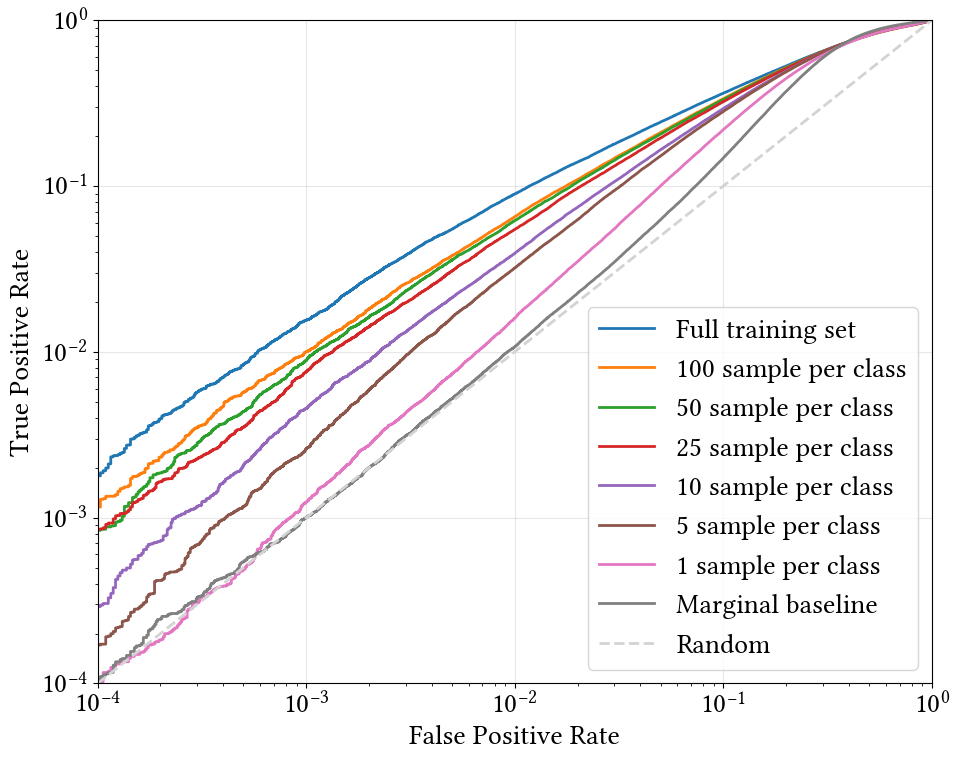

In [68]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

MIN = 1e-4
plt.figure(figsize=(10, 8))
rcParams['font.family'] = 'Linux Libertine O'
rcParams['font.size']=20

plt.plot(base_fpr, base_tpr, label="Full training set", linewidth=2)
flipped_tprs = tprs[::-1]
flipped_fprs = fprs[::-1]
flipped_settings = settings[::-1]
for setting, (tpr, fpr) in zip(flipped_settings, zip(flipped_tprs, flipped_fprs)):
    plt.plot(fpr, tpr, label=f"{setting} sample per class", linewidth=2)
plt.plot(base_marginal_fpr, base_marginal_tpr, color='gray', label="Marginal baseline", linewidth=2)
plt.plot([MIN, 1], [MIN, 1], linestyle='--', color='lightgray', label="Random", linewidth=2)
plt.xlim([MIN, 1])
plt.ylim([MIN, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

In [7]:
output_dict = {}
for setting, (tpr, fpr) in zip(settings, zip(tprs, fprs)):
    output_dict[f"cls_drop_none_samples_{setting}"] = (fpr, tpr)
output_dict["cls_drop_none"] = (base_fpr, base_tpr)
output_dict["marginal"] = (base_marginal_fpr, base_marginal_tpr)
np.savez("data_for_pt/inet_sample_drop_data.npz", **output_dict)